In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ANKITHA\Downloads/credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.isnull()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

In [7]:
df=df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

# Data Preprocessing

# Split The Data

In [12]:
X=df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]
y=df[['loan_status']]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21375, 11) (21375, 1)
(7126, 11) (7126, 1)


# Separate Numerical and Categorical Features

In [14]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [15]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
21498,1.157527,-0.284092,0.282884,-0.737688,0.756754,-0.657825,1.039744
25618,0.998354,0.326576,2.421356,0.847722,-0.789782,0.002524,0.050481
29352,1.635045,-0.656230,-1.142764,-0.301700,0.462323,1.417559,2.029006
19098,0.680008,-0.345714,0.045276,-1.181603,1.429296,-1.129503,-0.196834
2420,-0.752547,0.718190,0.520492,-1.134041,-1.136900,-1.412510,-0.691466


# Testing

In [16]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [17]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns=X_test_num.columns, 
                                   index=X_test_num.index)
X_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
24991,0.361663,-0.530827,2.421356,0.292828,1.299126,1.794901,0.050481
11470,-0.752547,0.132272,-0.429940,0.752598,-1.552202,0.191196,-0.444150
22515,0.998354,-0.422881,0.045276,-0.388898,0.208183,0.096860,-0.196834
4257,-0.911719,-0.499985,-0.192332,-0.301700,1.292928,0.568538,-0.938781
27232,-0.115855,0.764530,-1.142764,-0.975500,0.462323,-1.318174,1.039744


# Feature Engineering: Applying One-Hot Encoding on Categorical Features

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)

X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (21375, 4)
Shape of Data after Transformation: (21375, 19)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
21498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
25618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29352,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Testing

In [19]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [20]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                        columns=encoder_.get_feature_names_out(), 
                        index=X_test_cat.index)
X_test_cat_tansformed.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
24991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22515,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27232,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# X_train_transformed

In [21]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
21498,1.157527,-0.284092,0.282884,-0.737688,0.756754,-0.657825,1.039744,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
25618,0.998354,0.326576,2.421356,0.847722,-0.789782,0.002524,0.050481,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29352,1.635045,-0.656230,-1.142764,-0.301700,0.462323,1.417559,2.029006,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19098,0.680008,-0.345714,0.045276,-1.181603,1.429296,-1.129503,-0.196834,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2420,-0.752547,0.718190,0.520492,-1.134041,-1.136900,-1.412510,-0.691466,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# X_test_transformed

In [22]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
24991,0.361663,-0.530827,2.421356,0.292828,1.299126,1.794901,0.050481,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11470,-0.752547,0.132272,-0.429940,0.752598,-1.552202,0.191196,-0.444150,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22515,0.998354,-0.422881,0.045276,-0.388898,0.208183,0.096860,-0.196834,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4257,-0.911719,-0.499985,-0.192332,-0.301700,1.292928,0.568538,-0.938781,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27232,-0.115855,0.764530,-1.142764,-0.975500,0.462323,-1.318174,1.039744,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Training

# KNN-K Nearest neighbour

In [23]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [24]:
y_test_pred = regressor.predict(X_test_transformed)

In [25]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_test_pred)

0.15652539994386755

In [26]:
output_df = pd.DataFrame({'Actual': y_test.values.flatten()}, index=X_test.index)

In [27]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions
24991,1,0.8
11470,0,0.0
22515,1,0.6
4257,1,0.2
27232,1,0.0
...,...,...
18560,1,0.2
23521,1,0.0
10649,0,0.0
2514,1,0.0


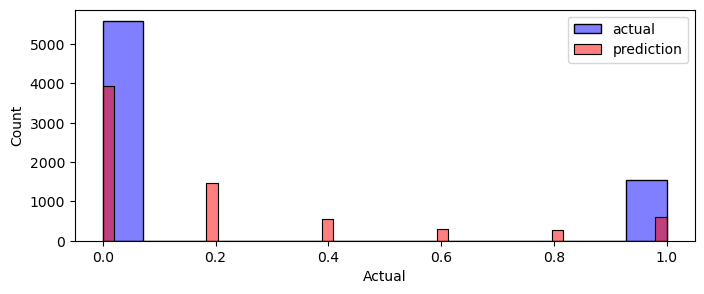

In [28]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Decisison Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [30]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_test_pred)

0.0887735054729161

In [31]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions
24991,1,0.8,0.8
11470,0,0.0,0.0
22515,1,0.6,0.6
4257,1,0.2,0.2
27232,1,0.0,0.0
...,...,...,...
18560,1,0.2,0.2
23521,1,0.0,0.0
10649,0,0.0,0.0
2514,1,0.0,0.0


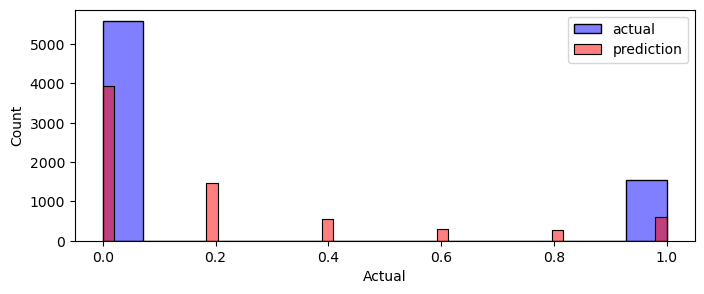

In [32]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [34]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.29794883029291475

In [35]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions,Linear Regression Predictions
24991,1,0.8,0.8,0.8
11470,0,0.0,0.0,0.0
22515,1,0.6,0.6,0.6
4257,1,0.2,0.2,0.2
27232,1,0.0,0.0,0.0
...,...,...,...,...
18560,1,0.2,0.2,0.2
23521,1,0.0,0.0,0.0
10649,0,0.0,0.0,0.0
2514,1,0.0,0.0,0.0


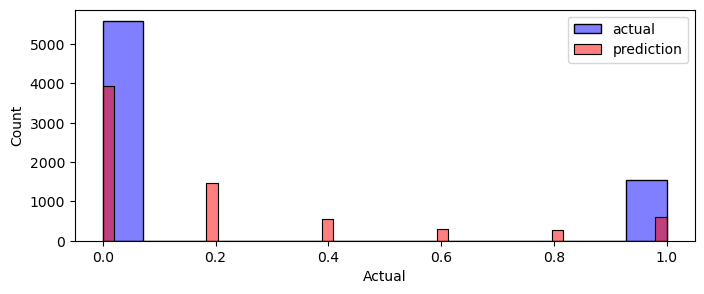

In [36]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

C:\ProgramData\Anaconda3_\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [38]:
y_test_pred = regressor.predict(X_test_transformed)

In [39]:
from sklearn import metrics
metrics.r2_score(y_test, y_test_pred)

0.6856049984084029

In [40]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,KNN Regression Predictions,DT Regression Predictions,Linear Regression Predictions,RF Regression Predictions
24991,1,0.8,0.8,0.8,1.00
11470,0,0.0,0.0,0.0,0.00
22515,1,0.6,0.6,0.6,0.84
4257,1,0.2,0.2,0.2,0.42
27232,1,0.0,0.0,0.0,0.17
...,...,...,...,...,...
18560,1,0.2,0.2,0.2,1.00
23521,1,0.0,0.0,0.0,0.14
10649,0,0.0,0.0,0.0,0.03
2514,1,0.0,0.0,0.0,1.00


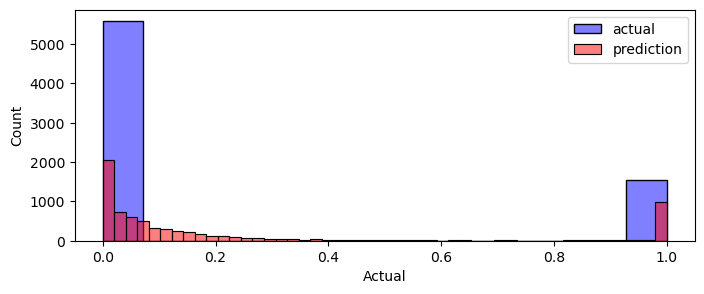

In [41]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# COMPARISION OF MODELS

In [42]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,1.0
1,Actual,0.0
2,Actual,1.0
3,Actual,1.0
4,Actual,1.0


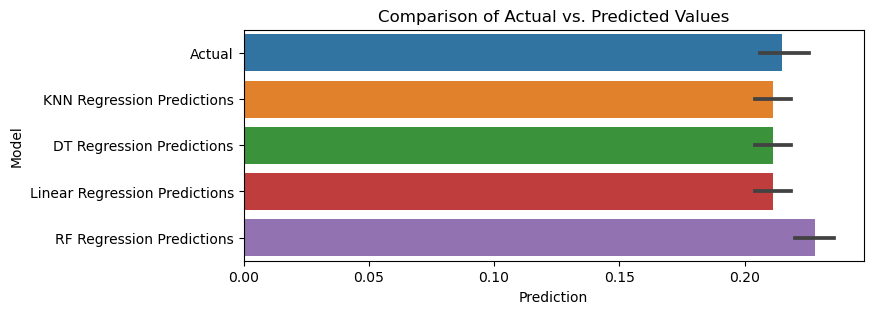

In [43]:
fig, ax = plt.subplots(figsize=(8,3))

sns.barplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

# Conclusion:

# From the above comparison we can conclude that,RF Regression can equally predict for the Loan Approval Prediction Problem